<a href="https://colab.research.google.com/github/leeyerin25/ML-Analysis/blob/main/%EB%B6%84%EB%A5%98%EB%A5%BC_%EC%9C%84%ED%95%9C_7%EA%B0%9C%EC%9D%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%A0%81%EC%9A%A9_%EB%B0%8F_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/236109/codeshare/8394?page=1&dtype=recent

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,832 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and di

## 기말 과제 ~6/23
1. 문제정의
2. 데이터탐색및전처리
3. 분류예측 - 7개 알고리즘 적용해서 가장 최적한 모델 선정 후 결과
4. k-means - 예측결과해석하기 (선정시 실루엣 파악후 적절한 k 선택)
ex) 당뇨에 걸린 사람들은 이런사람드리었더라.  dataframe['cluster']=cluster_labels 의 클러스터 값 보고 특징 파악해서 내가 해석하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 범죄 분류 하기

TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]

> 들여쓴 블록



In [ ]:
filename ='/content/drive/MyDrive/4-1 데이터시각화/open (2)/train.csv'

df0 = pd.read_csv(filename)

df0.head(10)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
5,TRAIN_00005,5,화요일,8,447,13.0,2.037493,4.125,0.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
6,TRAIN_00006,8,목요일,8,1846,36.0,2.321947,3.250,0.0,0.0,120.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,차도,1
7,TRAIN_00007,6,수요일,11,1527,45.0,3.568574,1.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
8,TRAIN_00008,9,수요일,2,1526,45.0,3.805744,0.000,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,2
9,TRAIN_00009,7,월요일,2,1747,46.0,1.453440,0.000,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2


In [ ]:
filename2 ='/content/drive/MyDrive/4-1 데이터시각화/open (2)/test.csv'

test = pd.read_csv(filename2)


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [ ]:
df0.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<Axes: >

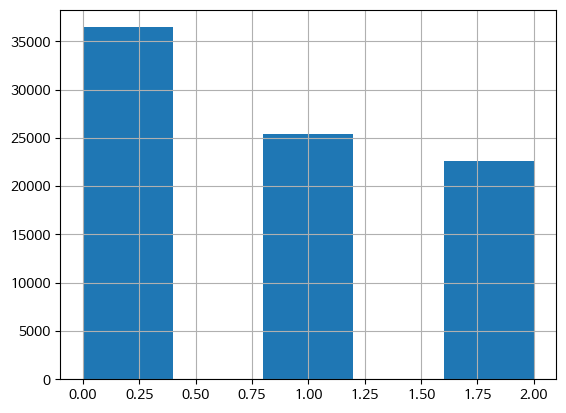

In [ ]:
df0['TARGET'].hist(bins=5)

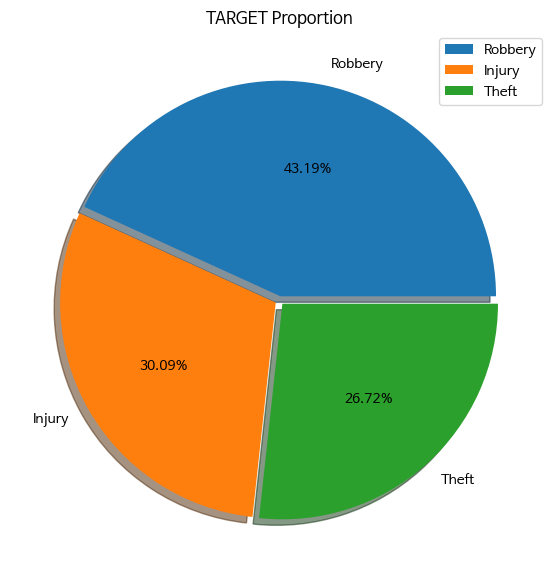

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,7), facecolor = 'w')
plt.pie(x = df0['TARGET'].value_counts(), autopct = '%.2f%%',
       labels = ['Robbery', 'Injury', 'Theft'], shadow = True, explode = [0.02, 0.02, 0.02])
plt.legend()
plt.title("TARGET Proportion")
plt.show()

In [ ]:
df0.columns

Index(['ID', '월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지', 'TARGET'],
      dtype='object')

In [ ]:
df_col=df0[['월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지']]

In [ ]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)

    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

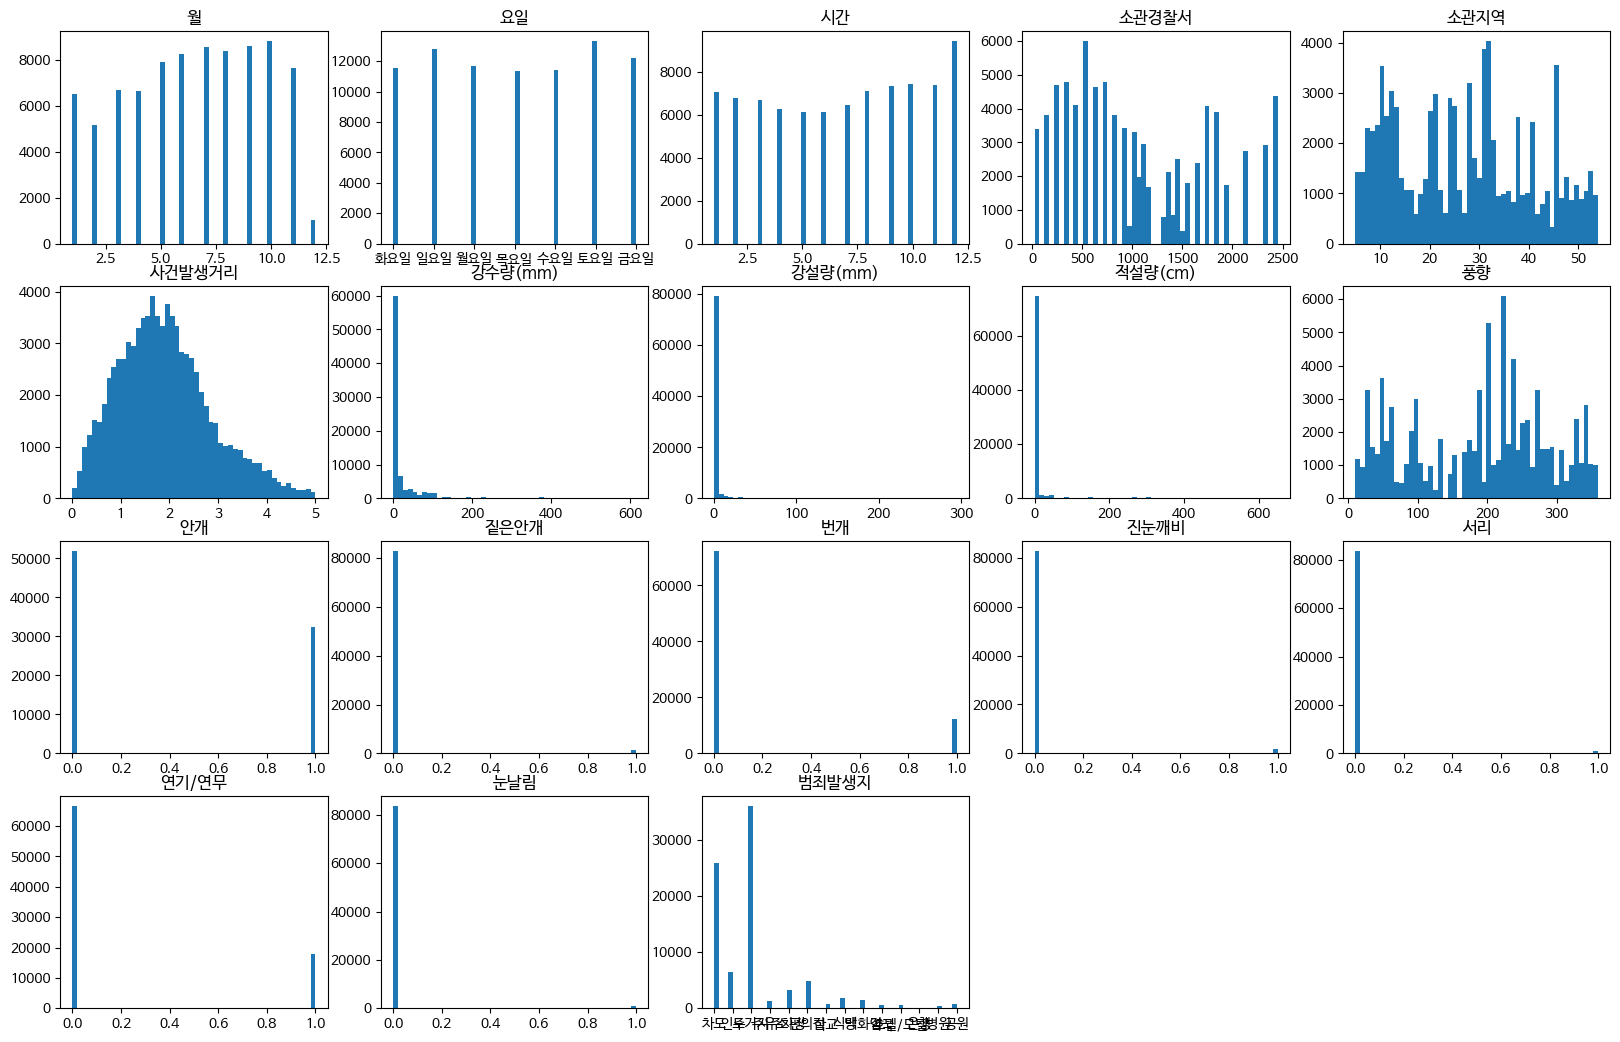

In [ ]:
plot_hist_each_column(df_col)

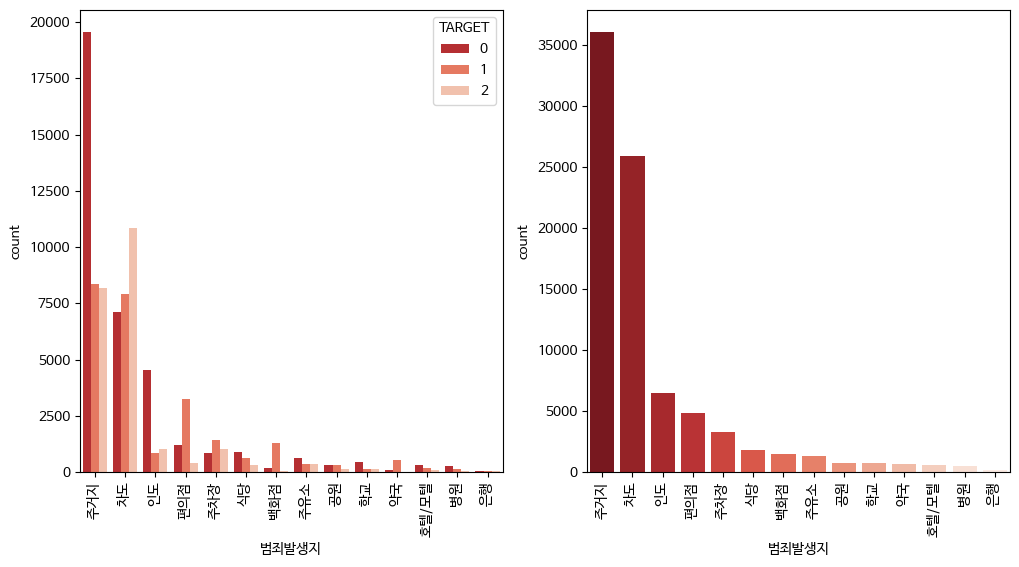

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))

plt.subplot(121)
sns.countplot(x = '범죄발생지', data = df0, order = df0['범죄발생지'].value_counts().index, hue = 'TARGET', palette = 'Reds_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '범죄발생지', data = df0, order = df0['범죄발생지'].value_counts().index, palette = 'Reds_r')
plt.xticks(rotation = 90)

plt.show()

[0 : 강도, 1: 절도, 2: 상해]

## 전처리

### object 처리하기

1. 요일 (원핫인코딩)

In [ ]:
week_encoding = pd.get_dummies(df0['요일'])
df0 = df0.drop('요일', axis=1)
df0 = df0.join(week_encoding)

df0

,ID,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET,금요일,목요일,수요일,월요일,일요일,토요일,화요일
0,TRAIN_00000,9,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2,0,0,0,0,0,0,1
1,TRAIN_00001,11,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0,0,0,0,0,0,0,1
2,TRAIN_00002,8,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1,0,0,0,0,1,0,0
3,TRAIN_00003,5,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1,0,0,0,1,0,0,0
4,TRAIN_00004,9,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,TRAIN_84401,4,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1,0,0,0,0,1,0,0
84402,TRAIN_84402,8,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0,0,1,0,0,0,0,0
84403,TRAIN_84403,7,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0,0,0,0,0,1,0,0
84404,TRAIN_84404,1,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1,0,0,0,0,0,0,1


2.범죄발생지

In [ ]:
sorted(df0['범죄발생지'].unique())

['공원',
 '백화점',
 '병원',
 '식당',
 '약국',
 '은행',
 '인도',
 '주거지',
 '주유소',
 '주차장',
 '차도',
 '편의점',
 '학교',
 '호텔/모텔']

In [ ]:
sorted(test['범죄발생지'].unique())

['공원',
 '백화점',
 '병원',
 '식당',
 '약국',
 '은행',
 '인도',
 '주거지',
 '주유소',
 '주차장',
 '차도',
 '편의점',
 '학교',
 '호텔/모텔']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le = le.fit(df0['범죄발생지'])
df0['범죄발생지'] = le.transform(df0['범죄발생지'])

In [ ]:

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
for label in np.unique(test['범죄발생지']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)
test['범죄발생지'] = le.transform(test['범죄발생지'])

IndentationError: ignored

In [ ]:
print(le)

In [ ]:
df0

In [ ]:
# 정수형으로 변환
for k in ['소관경찰서','소관지역','풍향','안개','짙은안개','번개','진눈깨비','서리','연기/연무','눈날림','범죄발생지','TARGET']:
  df0[k] = df0[k].astype('int')

In [ ]:
df0 = df0.drop('ID', axis = 1)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   시간       84406 non-null  int64  
 2   소관경찰서    84406 non-null  int64  
 3   소관지역     84406 non-null  int64  
 4   사건발생거리   84406 non-null  float64
 5   강수량(mm)  84406 non-null  float64
 6   강설량(mm)  84406 non-null  float64
 7   적설량(cm)  84406 non-null  float64
 8   풍향       84406 non-null  int64  
 9   안개       84406 non-null  int64  
 10  짙은안개     84406 non-null  int64  
 11  번개       84406 non-null  int64  
 12  진눈깨비     84406 non-null  int64  
 13  서리       84406 non-null  int64  
 14  연기/연무    84406 non-null  int64  
 15  눈날림      84406 non-null  int64  
 16  범죄발생지    84406 non-null  int64  
 17  TARGET   84406 non-null  int64  
 18  금요일      84406 non-null  uint8  
 19  목요일      84406 non-null  uint8  
 20  수요일      84406 non-null  uint8  
 21  월요일      844

## 모델 학습하기

In [ ]:
#실제값 들어갈때 하기.
#y_train = train['TARGET']
#X_train = train.drop('TARGET', axis=1)

#### 성능파악을 위해 train 데이터를 8:2 로 나눠 검증용 데이터를 만든다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report #한번에 선응평가 지표 찍어줌

In [ ]:
train, test = train_test_split(df0, test_size=0.2, random_state=2019)

In [ ]:
x_train = train.drop(['TARGET'], axis=1)
y_train = train.TARGET

x_test = test.drop(['TARGET'], axis=1)
y_test = test.TARGET

print(len(train), len(test))

67524 16882


###회귀분석 성능 3%

In [ ]:
from sklearn import linear_model
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train) #학습데이터로 모델생성

In [ ]:
# 회귀 분석 모델을 평가합니다.
print(model.score(x_train, y_train)) # train R2 score를 출력합니다.
print(model.score(x_test, y_test)) # test R2 score를 출력합니다.

0.03065654550644159
0.03452113125662781


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### desicion tree 성능 43%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:
confusion = confusion_matrix( y_test, y_pred)
print(confusion)

[[3620 1801 1880]
 [1667 2183 1164]
 [1843 1177 1547]]


In [ ]:
accuracy = accuracy_score(y_test , y_pred)

print(f'정확도: {accuracy}')

정확도: 0.43537495557398415


단순나무는 성능이 좋지않음을 알수있다

In [ ]:
from sklearn.model_selection import GridSearchCV
#train데이터로 하는게 아니고 전체데이터를 k-fold 로 진행시킴
params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1 ) #5조각
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.5435
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


### random forest 성능 52%

In [ ]:
# 데이터 표준화
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=200) #100개합함
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test , y_pred)

print(f'정확도: {accuracy}')

정확도: 0.5146309678947992


### xgboost 성능 55%

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
dtr = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test , label=y_test)

In [ ]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective': 'multi:softmax',
     'num_class': 3,
        'eval_metric': 'mlogloss'
         }
num_rounds = 400
# 최대 400회 반복하라.

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds ,
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-mlogloss:1.09107	eval-mlogloss:1.09101
[1]	train-mlogloss:1.08394	eval-mlogloss:1.08388
[2]	train-mlogloss:1.07736	eval-mlogloss:1.07728
[3]	train-mlogloss:1.07120	eval-mlogloss:1.07108
[4]	train-mlogloss:1.06549	eval-mlogloss:1.06536
[5]	train-mlogloss:1.06022	eval-mlogloss:1.06008
[6]	train-mlogloss:1.05502	eval-mlogloss:1.05492
[7]	train-mlogloss:1.05044	eval-mlogloss:1.05033
[8]	train-mlogloss:1.04621	eval-mlogloss:1.04607
[9]	train-mlogloss:1.04198	eval-mlogloss:1.04189
[10]	train-mlogloss:1.03810	eval-mlogloss:1.03803
[11]	train-mlogloss:1.03467	eval-mlogloss:1.03456
[12]	train-mlogloss:1.03146	eval-mlogloss:1.03131
[13]	train-mlogloss:1.02837	eval-mlogloss:1.02820
[14]	train-mlogloss:1.02547	eval-mlogloss:1.02533
[15]	train-mlogloss:1.02265	eval-mlogloss:1.02249
[16]	train-mlogloss:1.02011	eval-mlogloss:1.01994
[17]	train-mlogloss:1.01770	eval-mlogloss:1.01755
[18]	train-mlogloss:1.01536	eval-mlogloss:1.01518
[19]	train-mlogloss:1.01330	eval-mlogloss:1.01316
[20]	train

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))
y_pred = pred_probs
# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
#y_pred = [ 1 if x > 0.5 else 0 for x in pred_probs ]
#print('예측값 10개만 표시:',y_pred[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[2. 0. 2. 2. 1. 0. 0. 0. 0. 0.]


In [ ]:
accuracy = accuracy_score(y_test , y_pred)

print(f'정확도: {accuracy}')

정확도: 0.5510010662243809


In [ ]:
roc_auc = roc_auc_score(y_test, pred_probs)
print("ROC_AUC Score:", roc_auc)

### 딥러닝 - 성능 53%

In [ ]:
y_train

57845    2
76513    2
40398    1
39899    0
65928    1
        ..
32472    0
12069    1
60575    0
26994    2
40008    0
Name: TARGET, Length: 67524, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical

# 클래스 레이블을 원-핫 인코딩으로 변환
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# DNN 모델 구성
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train_encoded, epochs=50, batch_size=10, verbose=1)

# 예측
y_pred_encoded = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_encoded, axis=1)

# 성능 평가
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_classes))


Epoch 1/50
6753/6753 [==============================] - 18s 2ms/step - loss: 1.0339 - accuracy: 0.4835
Epoch 2/50
6753/6753 [==============================] - 16s 2ms/step - loss: 1.0124 - accuracy: 0.5062
Epoch 3/50
6753/6753 [==============================] - 17s 3ms/step - loss: 1.0024 - accuracy: 0.5170
Epoch 4/50
6753/6753 [==============================] - 18s 3ms/step - loss: 0.9970 - accuracy: 0.5227
Epoch 5/50
6753/6753 [==============================] - 17s 3ms/step - loss: 0.9942 - accuracy: 0.5218
Epoch 6/50
6753/6753 [==============================] - 16s 2ms/step - loss: 0.9921 - accuracy: 0.5262
Epoch 7/50
6753/6753 [==============================] - 16s 2ms/step - loss: 0.9916 - accuracy: 0.5246
Epoch 8/50
6753/6753 [==============================] - 16s 2ms/step - loss: 0.9898 - accuracy: 0.5269
Epoch 9/50
6753/6753 [==============================] - 16s 2ms/step - loss: 0.9896 - accuracy: 0.5276
Epoch 10/50
6753/6753 [==============================] - 17s 2ms/step - l

### svm 성능 45%

In [ ]:
# 데이터 표준화
sc = StandardScaler()
x_trains = sc.fit_transform(x_train)
x_tests = sc.transform(x_test)

In [ ]:
# SVM 모델 생성
model = svm.SVC(kernel='linear', C=1.0, random_state=42)

# 모델 훈련
model.fit(x_trains, y_train)

# 예측
y_pred = model.predict(x_tests)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.85      0.60      7301
           1       0.00      0.00      0.00      5014
           2       0.41      0.33      0.36      4567

    accuracy                           0.45     16882
   macro avg       0.29      0.39      0.32     16882
weighted avg       0.31      0.45      0.36     16882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### light gbm 2 성능 52%

In [ ]:
df0.info()

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def evaluate_macroF1_lgb(truth, predictions):  #f1스코어
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True)


lgbm_clf = LGBMClassifier(n_estimators = 5000, learning_rate=0.01, random_state = 1234)
lgbm_clf.fit(x_train, y_train, eval_set = (x_test, y_test), eval_metric = evaluate_macroF1_lgb,
             #범주형 범수 취급
            #categorical_feature = ['시간', '소관경찰서',	'소관지역', '풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림',	'범죄발생지'],
            verbose = 100, early_stopping_rounds = 800)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's multi_logloss: 0.983266	valid_0's macroF1: 0.503642
[200]	valid_0's multi_logloss: 0.965986	valid_0's macroF1: 0.517465
[300]	valid_0's multi_logloss: 0.961232	valid_0's macroF1: 0.522903
[400]	valid_0's multi_logloss: 0.959273	valid_0's macroF1: 0.524143
[500]	valid_0's multi_logloss: 0.958239	valid_0's macroF1: 0.52535
[600]	valid_0's multi_logloss: 0.957737	valid_0's macroF1: 0.526382
[700]	valid_0's multi_logloss: 0.957523	valid_0's macroF1: 0.526444
[800]	valid_0's multi_logloss: 0.957474	valid_0's macroF1: 0.526003
[900]	valid_0's multi_logloss: 0.957399	valid_0's macroF1: 0.525289
[1000]	valid_0's multi_logloss: 0.957371	valid_0's macroF1: 0.524827
[1100]	valid_0's multi_logloss: 0.957336	valid_0's macroF1: 0.52422
[1200]	valid_0's multi_logloss: 0.957251	valid_0's macroF1: 0.52439
[1300]	valid_0's multi_logloss: 0.957332	valid_0's macroF1: 0.524462
[1400]	valid_0's multi_logloss: 0.957472	valid_0's macroF1: 0.524913


LGBMClassifier(learning_rate=0.01, n_estimators=5000, random_state=1234)

## 테스트 데이터로 예측한 결과 군집화 ==> K-Means 알고리즘 적용

    :실루엣 계수를 이용한 적절한 K 선정 및 PCA로 군집 결과 시각화

k-means와 비교 위한 실제 타겟값 분포 확인

In [ ]:
#print(df0.data)
print(df0.TARGET)

### 상관관계 분석

1.정규화

In [ ]:
df1 = df0[df0.columns.difference(['TARGET'])]

In [ ]:
# Z-score 정규화 함수 정의
def zscore_normalize(x):
    return (x - x.mean()) / x.std()

# 각 변수에 대해 Z-score 정규화 적용
cordf = df1.apply(zscore_normalize)


타겟빼고 정규화

In [ ]:
cordf['target'] = df0['TARGET']
cordf

,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target
0,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2
1,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0
2,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1
3,-0.144100,-0.211027,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,0.009588,-0.101814,1.828477,1.882945,-0.395358,-0.215766,1.262749,-0.516750,-0.460121,2.492565,-0.423513,-0.275006,-0.144055,7.419288,-0.432812,0.387325,-0.398478,1
4,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.024382,-0.128008,-0.101814,0.542645,1.017829,-0.395358,1.186212,-0.791914,-0.516750,0.826755,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,0.692515,-0.398478,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,-0.144100,1.188023,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.977731,-0.101814,-1.036724,-1.144962,-0.395358,0.064629,1.262749,-0.516750,-0.781840,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-0.223054,-0.398478,1
84402,-0.144100,-0.392414,-0.411893,-0.094876,2.539497,-0.410219,0.908792,-0.473560,-0.101814,1.559282,0.801550,-0.395358,1.466607,-0.791914,1.935148,0.505036,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,-0.398478,0
84403,-0.144100,1.296102,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.077129,-0.101814,-1.476312,1.378294,-0.395358,-0.215766,-0.791914,-0.516750,0.183317,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,1.302895,-0.398478,0
84404,0.398388,-0.355966,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,-1.480085,-0.101814,-0.750347,-0.135659,-0.395358,1.186212,1.262749,1.935148,-1.746997,-0.401188,-0.423513,-0.148832,-0.144055,7.419288,-0.432812,1.455490,2.509521,1


In [ ]:
#상관관계 분석 -> k-means 시각화에 이용할 피처 뽑을 용도
df_corr = cordf[['월', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지', 'target']].corr(method = 'pearson')
df_corr

corr_df = df_corr.corr(method='pearson')
corr_df

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,target
월,1.000000,0.012176,0.056186,0.064312,0.008327,0.134305,-0.540888,-0.749690,-0.139096,-0.233654,-0.434426,0.341420,-0.405242,-0.351942,-0.164627,-0.429752,0.016633,-0.010849
시간,0.012176,1.000000,-0.094838,-0.089521,-0.041233,-0.096983,-0.111163,-0.102641,-0.063302,-0.162961,-0.108342,-0.082843,-0.109976,-0.100885,-0.127502,-0.111911,-0.046736,-0.027496
소관경찰서,0.056186,-0.094838,1.000000,0.920528,-0.321526,-0.135422,-0.146312,-0.145689,-0.091690,-0.215633,-0.139131,-0.112689,-0.135541,-0.132464,-0.138093,-0.149819,-0.081923,-0.084520
소관지역,0.064312,-0.089521,0.920528,1.000000,-0.301544,-0.127346,-0.152253,-0.153972,-0.089949,-0.214590,-0.145185,-0.100123,-0.139652,-0.140486,-0.141618,-0.155018,-0.116335,-0.090850
사건발생거리,0.008327,-0.041233,-0.321526,-0.301544,1.000000,-0.066515,-0.083334,-0.072022,-0.052510,-0.117086,-0.088487,-0.056728,-0.074813,-0.078903,-0.086972,-0.081387,-0.053107,-0.043897
강수량(mm),0.134305,-0.096983,-0.135422,-0.127346,-0.066515,1.000000,0.074467,-0.131397,-0.138564,0.440641,-0.216598,0.591300,-0.227433,-0.187775,-0.075129,0.021389,-0.120427,-0.134615
강설량(mm),-0.540888,-0.111163,-0.146312,-0.152253,-0.083334,0.074467,1.000000,0.765414,0.110065,0.124684,0.026355,-0.262074,-0.024956,-0.064773,0.028909,0.800369,-0.141528,-0.156993
적설량(cm),-0.749690,-0.102641,-0.145689,-0.153972,-0.072022,-0.131397,0.765414,1.000000,0.233834,0.151874,0.158203,-0.362617,0.199700,0.028593,0.166217,0.596740,-0.116909,-0.123223
풍향,-0.139096,-0.063302,-0.091690,-0.089949,-0.052510,-0.138564,0.110065,0.233834,1.000000,-0.111472,-0.053425,-0.055033,-0.226944,-0.275618,-0.095346,0.091384,-0.079596,-0.091812
안개,-0.233654,-0.162961,-0.215633,-0.214590,-0.117086,0.440641,0.124684,0.151874,-0.111472,1.000000,0.166537,0.466050,0.079903,0.107141,0.577682,0.089586,-0.181752,-0.189155


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


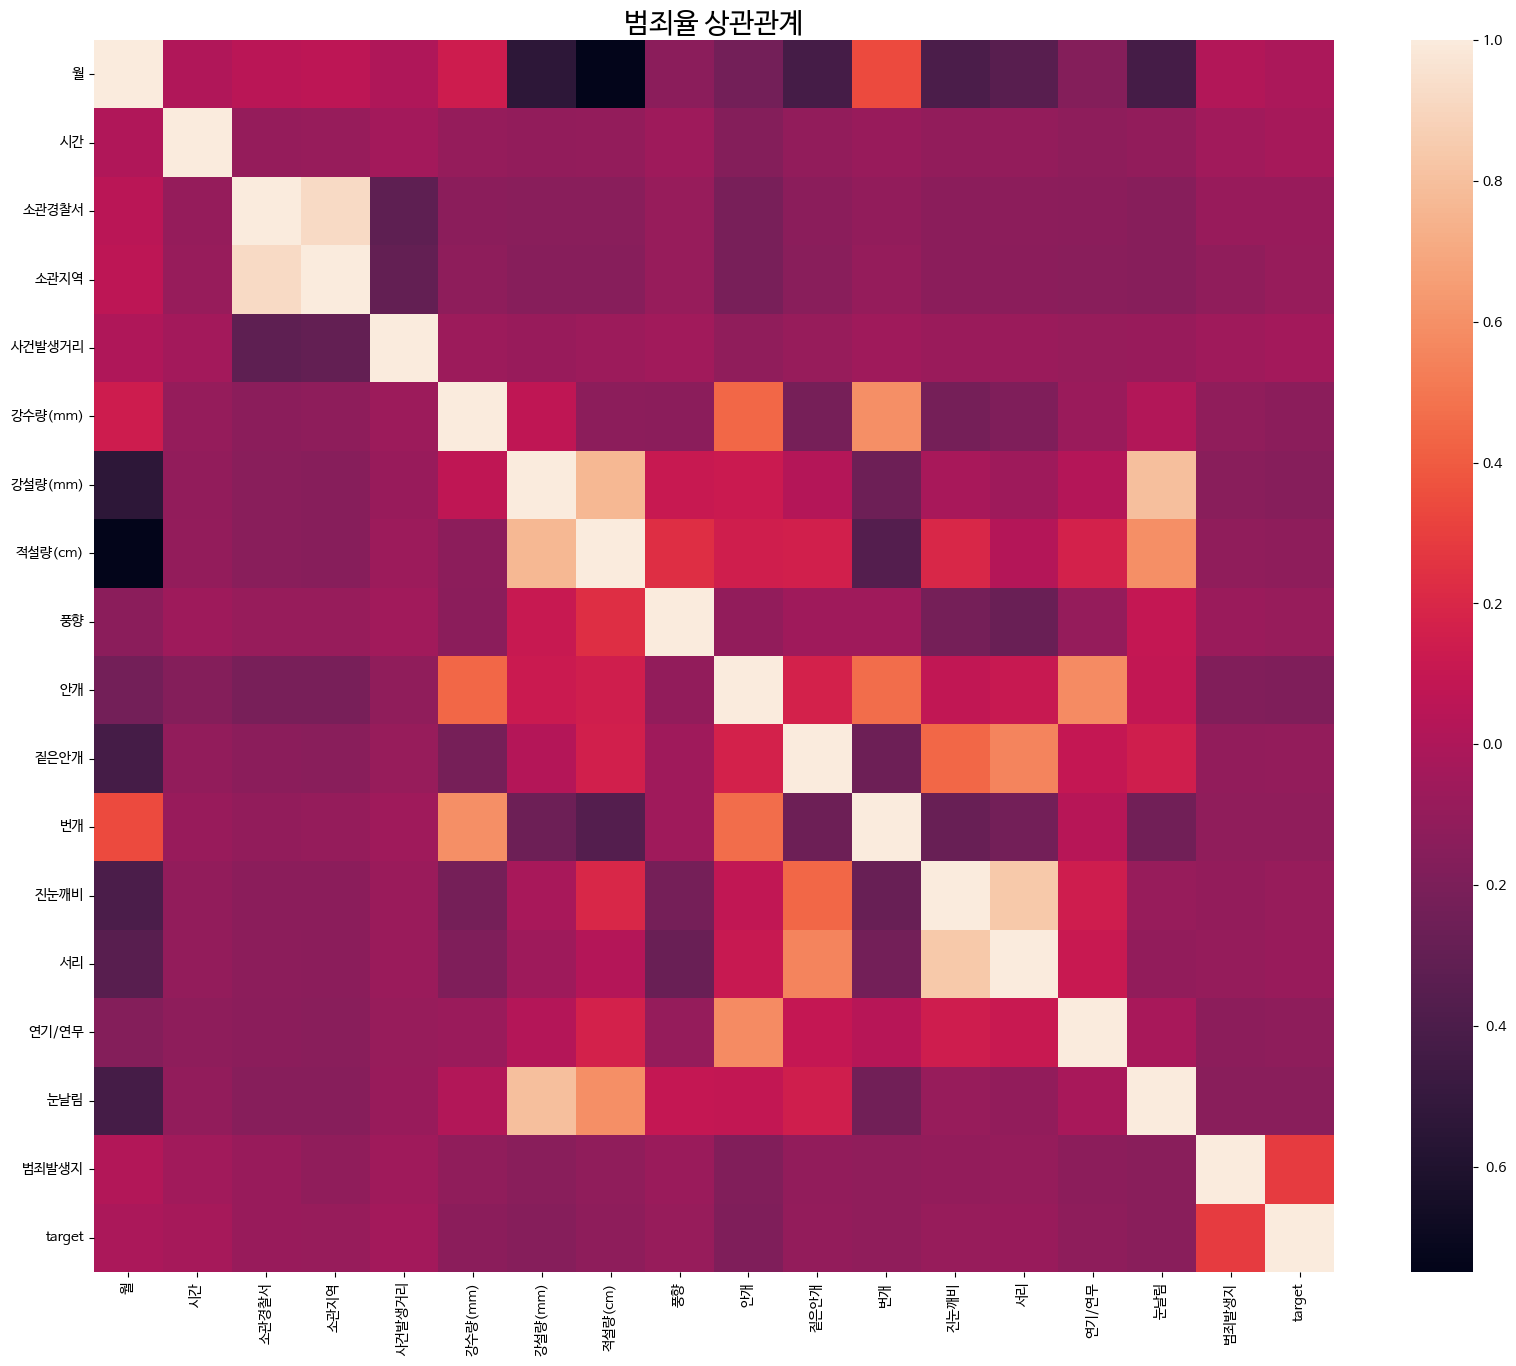

In [ ]:
import seaborn as sns
ax = sns.heatmap(corr_df)

plt.title('범죄율 상관관계', fontsize=20)

plt.show()

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
cordf

,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target
0,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2
1,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0
2,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1
3,-0.144100,-0.211027,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,0.009588,-0.101814,1.828477,1.882945,-0.395358,-0.215766,1.262749,-0.516750,-0.460121,2.492565,-0.423513,-0.275006,-0.144055,7.419288,-0.432812,0.387325,-0.398478,1
4,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.024382,-0.128008,-0.101814,0.542645,1.017829,-0.395358,1.186212,-0.791914,-0.516750,0.826755,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,0.692515,-0.398478,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,-0.144100,1.188023,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.977731,-0.101814,-1.036724,-1.144962,-0.395358,0.064629,1.262749,-0.516750,-0.781840,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-0.223054,-0.398478,1
84402,-0.144100,-0.392414,-0.411893,-0.094876,2.539497,-0.410219,0.908792,-0.473560,-0.101814,1.559282,0.801550,-0.395358,1.466607,-0.791914,1.935148,0.505036,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,-0.398478,0
84403,-0.144100,1.296102,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.077129,-0.101814,-1.476312,1.378294,-0.395358,-0.215766,-0.791914,-0.516750,0.183317,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,1.302895,-0.398478,0
84404,0.398388,-0.355966,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,-1.480085,-0.101814,-0.750347,-0.135659,-0.395358,1.186212,1.262749,1.935148,-1.746997,-0.401188,-0.423513,-0.148832,-0.144055,7.419288,-0.432812,1.455490,2.509521,1


정규화: ㅇ

이상치 처리:

피처 선택:

클러스터 개수 조정: K-means 알고리즘은 클러스터 개수를 사용자가 지정해주어야 합니다. 클러스터 개수를 조정하여 적절한 개수로 클러스터링을 수행해야 합니다. 일반적으로는 실루엣 계수, 엘보우 방법 등을 사용하여 적절한 클러스터 개수를 결정할 수 있습니다.

다른 클러스터링 알고리즘 시도:  DBSCAN, 계층적 클러스터링 등을 고려해 볼 수 있습니다.

초기화 방법 변경:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


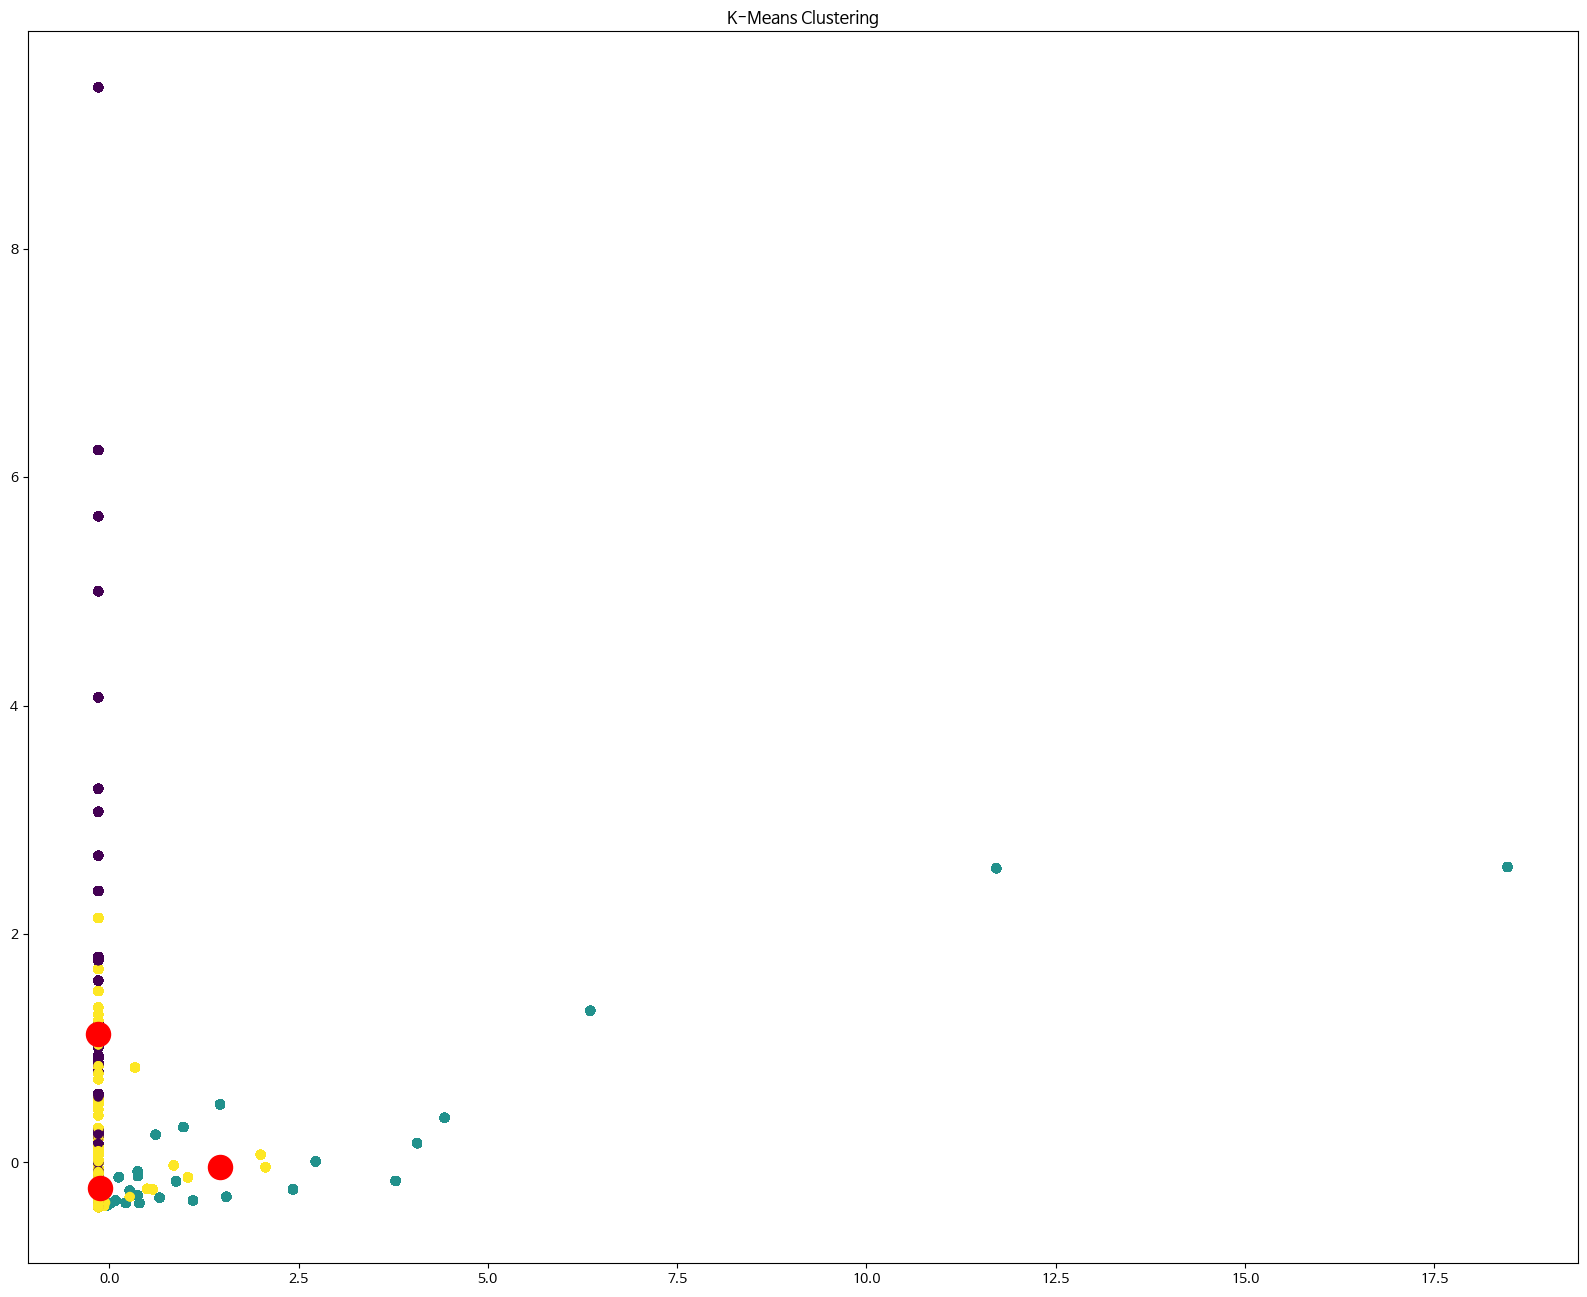

In [ ]:

# K-means 알고리즘 적용
kmeans = KMeans(n_clusters=3, random_state=0).fit(cordf.values)

# 클러스터 할당 결과를 얻음
labels = kmeans.labels_

# 결과 시각화
plt.scatter(cordf.values[:, 0], cordf.values[:, 1], c=labels, cmap='viridis')  # 첫 번째 특징과 두 번째 특징을 사용하여 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()

초기값 고려한 k-means

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=1234) #k-means++' 초기값을 랜덤으로시작하는게아닌 고려하고 시작하는것.
kmeans.fit(cordf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

레이블 다시 확인

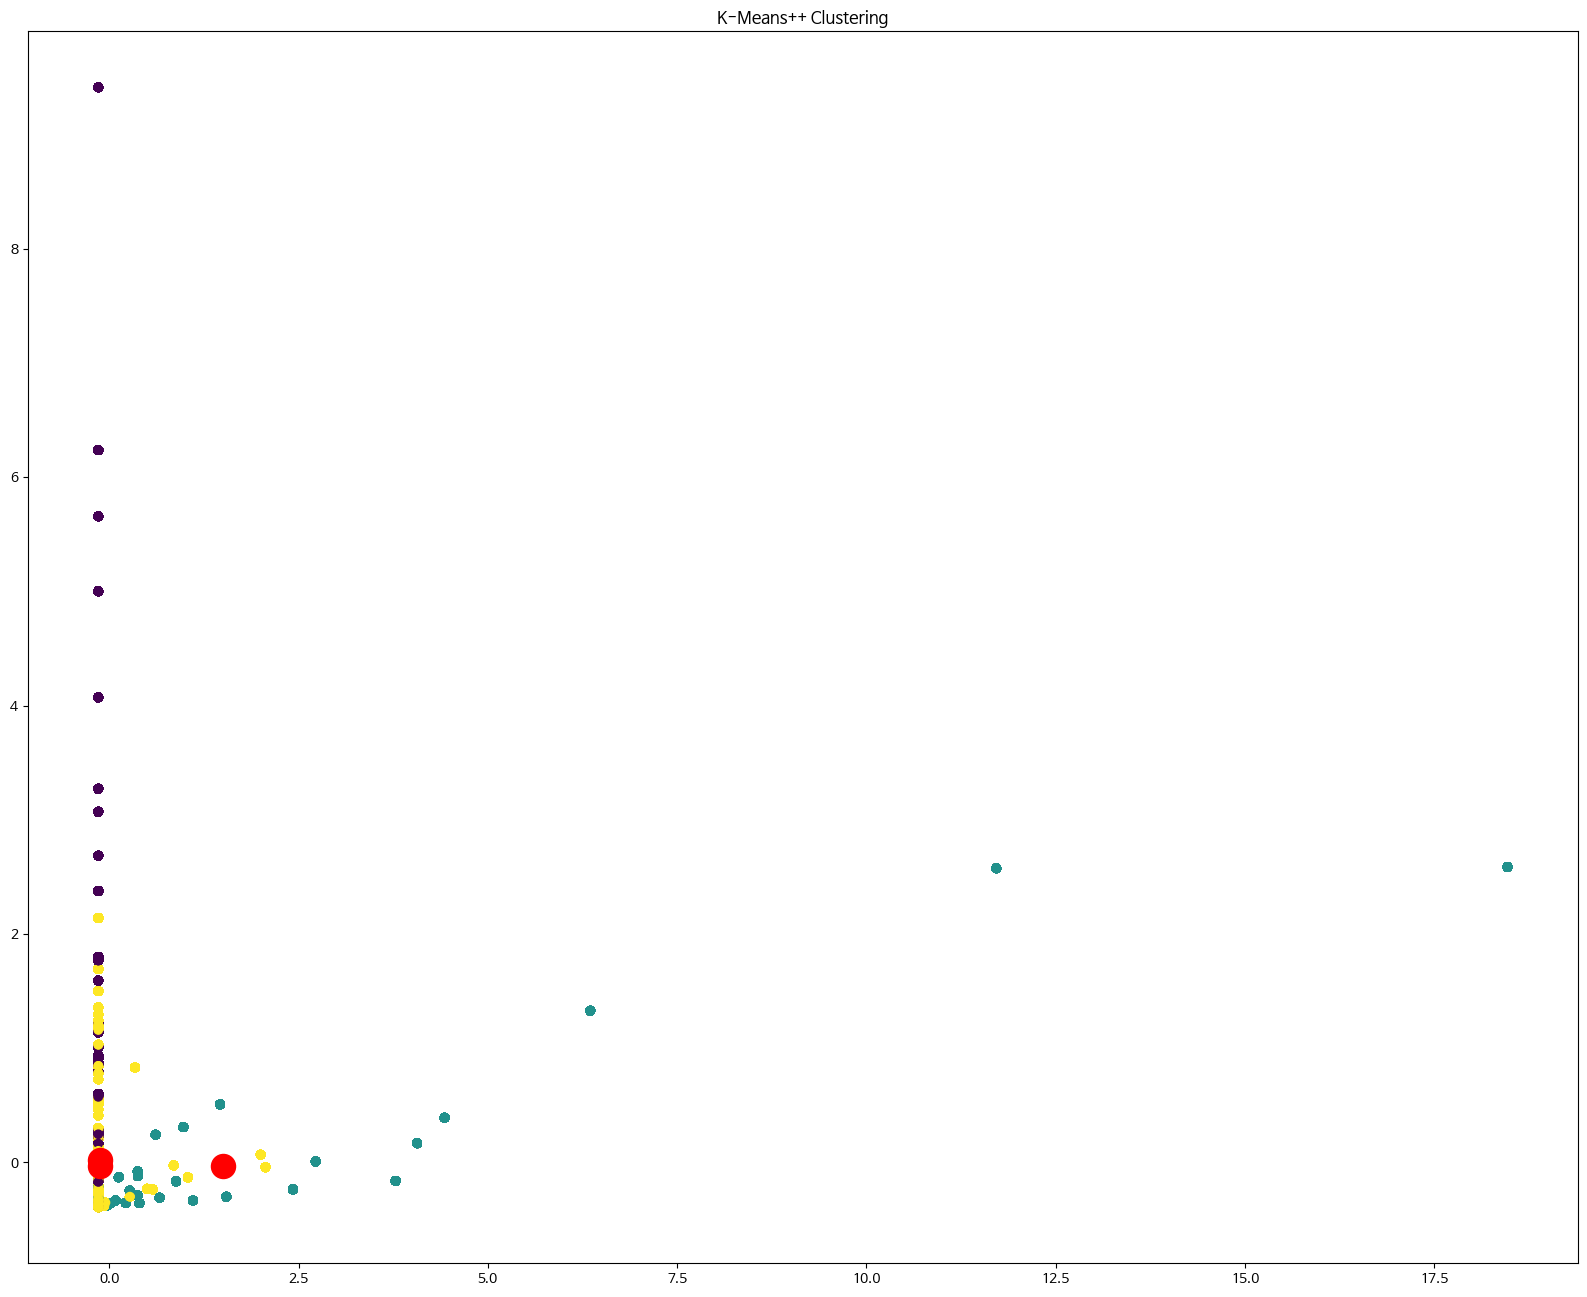

In [ ]:
plt.scatter(cordf.values[:, 0], cordf.values[:, 1], c=labels, cmap='viridis')  # 첫 번째 특징과 두 번째 특징을 사용하여 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means++ Clustering')
plt.show()

In [ ]:
print(df0.TARGET)

0        2
1        0
2        1
3        1
4        2
        ..
84401    1
84402    0
84403    0
84404    1
84405    0
Name: TARGET, Length: 84406, dtype: int64


실제값과 k-means 값 확인

In [ ]:
cordf

,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target
0,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2
1,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0
2,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1
3,-0.144100,-0.211027,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,0.009588,-0.101814,1.828477,1.882945,-0.395358,-0.215766,1.262749,-0.516750,-0.460121,2.492565,-0.423513,-0.275006,-0.144055,7.419288,-0.432812,0.387325,-0.398478,1
4,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.024382,-0.128008,-0.101814,0.542645,1.017829,-0.395358,1.186212,-0.791914,-0.516750,0.826755,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,0.692515,-0.398478,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,-0.144100,1.188023,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.977731,-0.101814,-1.036724,-1.144962,-0.395358,0.064629,1.262749,-0.516750,-0.781840,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-0.223054,-0.398478,1
84402,-0.144100,-0.392414,-0.411893,-0.094876,2.539497,-0.410219,0.908792,-0.473560,-0.101814,1.559282,0.801550,-0.395358,1.466607,-0.791914,1.935148,0.505036,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,-0.398478,0
84403,-0.144100,1.296102,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.077129,-0.101814,-1.476312,1.378294,-0.395358,-0.215766,-0.791914,-0.516750,0.183317,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,1.302895,-0.398478,0
84404,0.398388,-0.355966,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,-1.480085,-0.101814,-0.750347,-0.135659,-0.395358,1.186212,1.262749,1.935148,-1.746997,-0.401188,-0.423513,-0.148832,-0.144055,7.419288,-0.432812,1.455490,2.509521,1


In [ ]:
cordf['target'] = cordf.target
cordf['cluster']=kmeans.labels_
iris_result = cordf.groupby(['target','cluster'])['범죄발생지'].count()
print(iris_result)


target  cluster
0       0          21356
        1           2761
        2          12336
1       0          12282
        1           1750
        2          11365
2       0          13650
        1           1720
        2           7186
Name: 범죄발생지, dtype: int64


### PCA 분석

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #시각화 목적일떈 늘 2로 하기 / 줄이는 목적일땐 다른값이나올수있음
pca_transformed = pca.fit_transform(cordf)

cordf['pca_x'] = pca_transformed[:,0] #새로운열로추가
cordf['pca_y'] = pca_transformed[:,1]


In [ ]:
cordf.head(3)

,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target,cluster,pca_x,pca_y
0,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2,0,-1.188662,1.831541
1,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0,0,-1.360078,1.394521
2,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1,2,0.493322,-2.005283


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


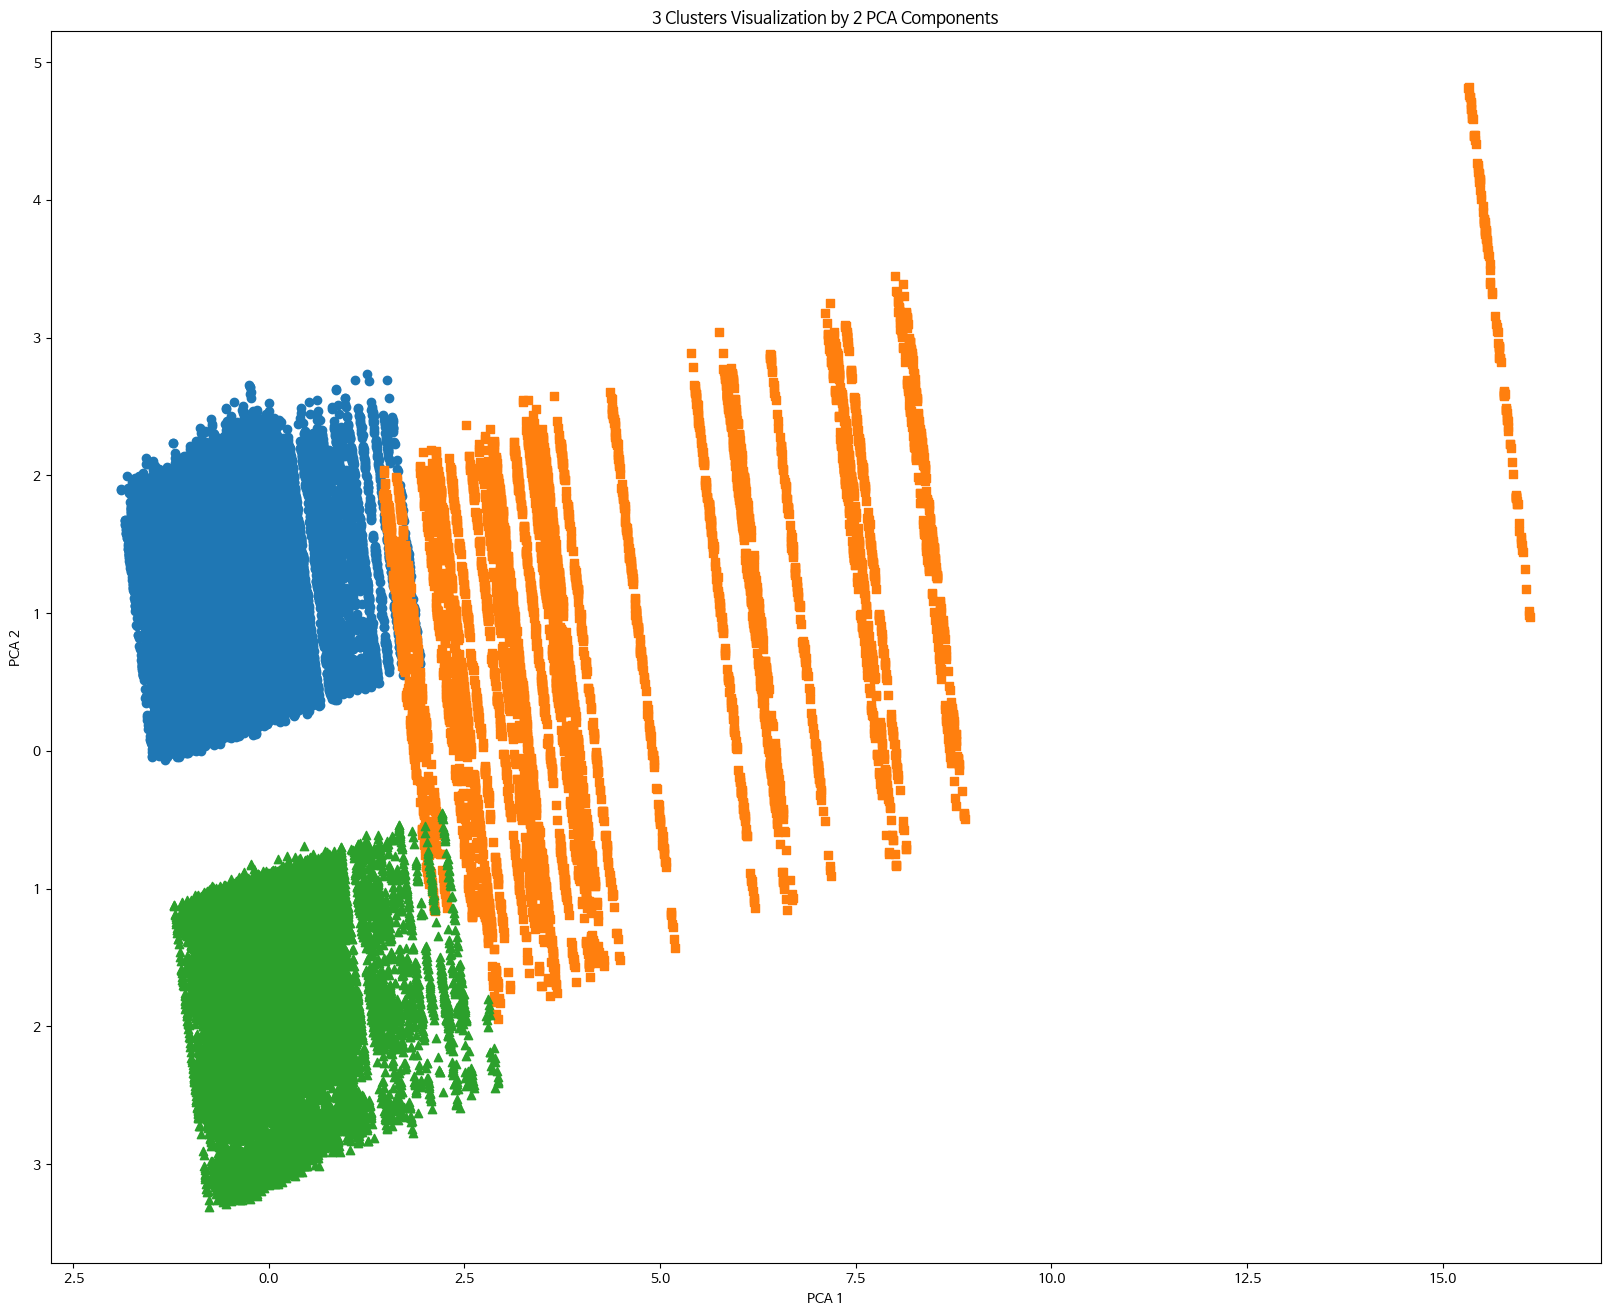

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = cordf[cordf['cluster']==0].index
marker1_ind = cordf[cordf['cluster']==1].index
marker2_ind = cordf[cordf['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=cordf.loc[marker0_ind, 'pca_x'], y=cordf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=cordf.loc[marker1_ind, 'pca_x'], y=cordf.loc[marker1_ind, 'pca_y'], marker='s') #사각형
plt.scatter(x=cordf.loc[marker2_ind, 'pca_x'], y=cordf.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

pca 후에 좀 나눠지는모습

In [ ]:
cordf

,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target,cluster,pca_x,pca_y
0,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2,0,-1.188662,1.831541
1,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0,0,-1.360078,1.394521
2,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1,2,0.493322,-2.005283
3,-0.144100,-0.211027,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,0.009588,-0.101814,1.828477,1.882945,-0.395358,-0.215766,1.262749,-0.516750,-0.460121,2.492565,-0.423513,-0.275006,-0.144055,7.419288,-0.432812,0.387325,-0.398478,1,1,2.924691,-1.684743
4,-0.144100,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.024382,-0.128008,-0.101814,0.542645,1.017829,-0.395358,1.186212,-0.791914,-0.516750,0.826755,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,0.692515,-0.398478,2,2,-0.619978,-1.802701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,-0.144100,1.188023,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.977731,-0.101814,-1.036724,-1.144962,-0.395358,0.064629,1.262749,-0.516750,-0.781840,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-0.223054,-0.398478,1,0,-0.233069,2.040096
84402,-0.144100,-0.392414,-0.411893,-0.094876,2.539497,-0.410219,0.908792,-0.473560,-0.101814,1.559282,0.801550,-0.395358,1.466607,-0.791914,1.935148,0.505036,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,-0.398478,0,2,0.026607,-2.124937
84403,-0.144100,1.296102,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.077129,-0.101814,-1.476312,1.378294,-0.395358,-0.215766,-0.791914,-0.516750,0.183317,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,1.302895,-0.398478,0,0,-0.746345,0.519962
84404,0.398388,-0.355966,-0.411893,-0.094876,-0.393774,-0.410219,-0.417822,-1.480085,-0.101814,-0.750347,-0.135659,-0.395358,1.186212,1.262749,1.935148,-1.746997,-0.401188,-0.423513,-0.148832,-0.144055,7.419288,-0.432812,1.455490,2.509521,1,1,3.570483,0.996862


원본 정규화 데이터

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
# 데이터 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(cordf, cordf['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (84406,)


In [ ]:
# DF에 실루엣 계수 컬럼 추가
cordf['silhouette_coeff'] = score_samples

In [ ]:
# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(cordf, cordf['cluster'])
print('범죄데이터 Silhouette Analysis Score:{0:.3f}'.format(average_score))

cordf.head(3)

범죄데이터 Silhouette Analysis Score:0.169


,강설량(mm),강수량(mm),금요일,눈날림,목요일,번개,범죄발생지,사건발생거리,서리,소관경찰서,소관지역,수요일,시간,안개,연기/연무,월,월요일,일요일,적설량(cm),진눈깨비,짙은안개,토요일,풍향,화요일,target,cluster,pca_x,pca_y,silhouette_coeff
0,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,0.728908,-0.101814,-1.321669,-1.361241,-0.395358,0.905816,-0.791914,-0.516750,0.826755,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.590785,2.509521,2,0,-1.188662,1.831541,0.266214
1,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,0.908792,1.352731,-0.101814,-0.890671,-1.000776,-0.395358,-0.215766,-0.791914,-0.516750,1.470194,-0.401188,-0.423513,-0.275006,-0.144055,-0.134782,-0.432812,0.133001,2.509521,0,0,-1.360078,1.394521,0.236491
2,-0.1441,-0.392414,-0.411893,-0.094876,-0.393774,-0.410219,-0.860027,-0.305488,-0.101814,0.957891,1.450387,-0.395358,-0.215766,1.262749,1.935148,0.505036,-0.401188,2.361175,-0.275006,-0.144055,-0.134782,-0.432812,-1.494678,-0.398478,1,2,0.493322,-2.005283,0.220254


In [ ]:
cordf.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.181877
1   -0.059755
2    0.195288
Name: silhouette_coeff, dtype: float64

-를 띄는 1군집이 좋지않다.

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)
#X 엔 클래스 떼고 넣는데이터 다른데이터도 넣어보셈

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


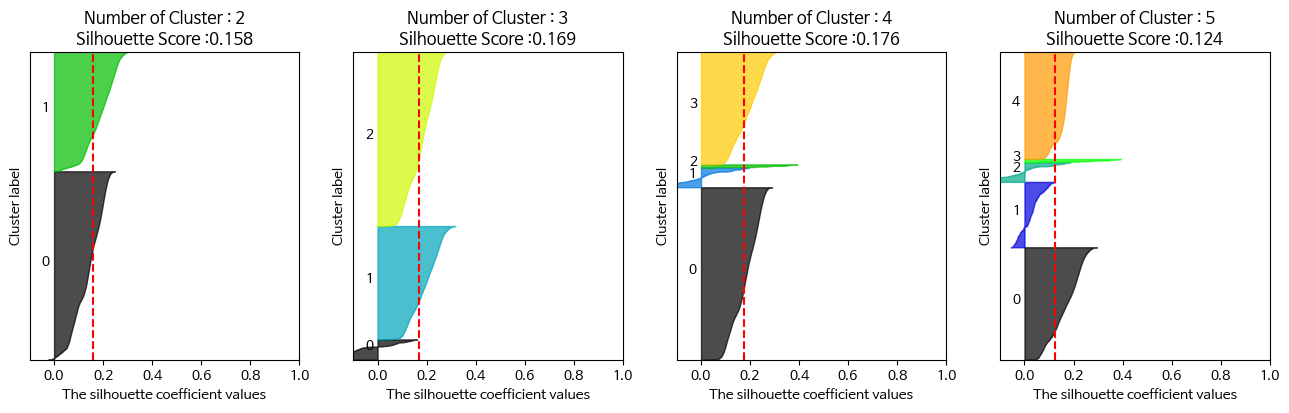

In [ ]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], cordf.values)

4~5개는 제외
2개로 진행하

In [ ]:

# K-means 알고리즘 적용
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(cordf.values)

# 클러스터 할당 결과를 얻음
labels2 = kmeans2.labels_

cordf['target'] = cordf.target
cordf['cluster2']=kmeans2.labels_
iris_result = cordf.groupby(['target','cluster2'])['범죄발생지'].count()
print(iris_result)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


target  cluster2
0       0           13122
        1           23331
1       0           11998
        1           13399
2       0            7639
        1           14917
Name: 범죄발생지, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


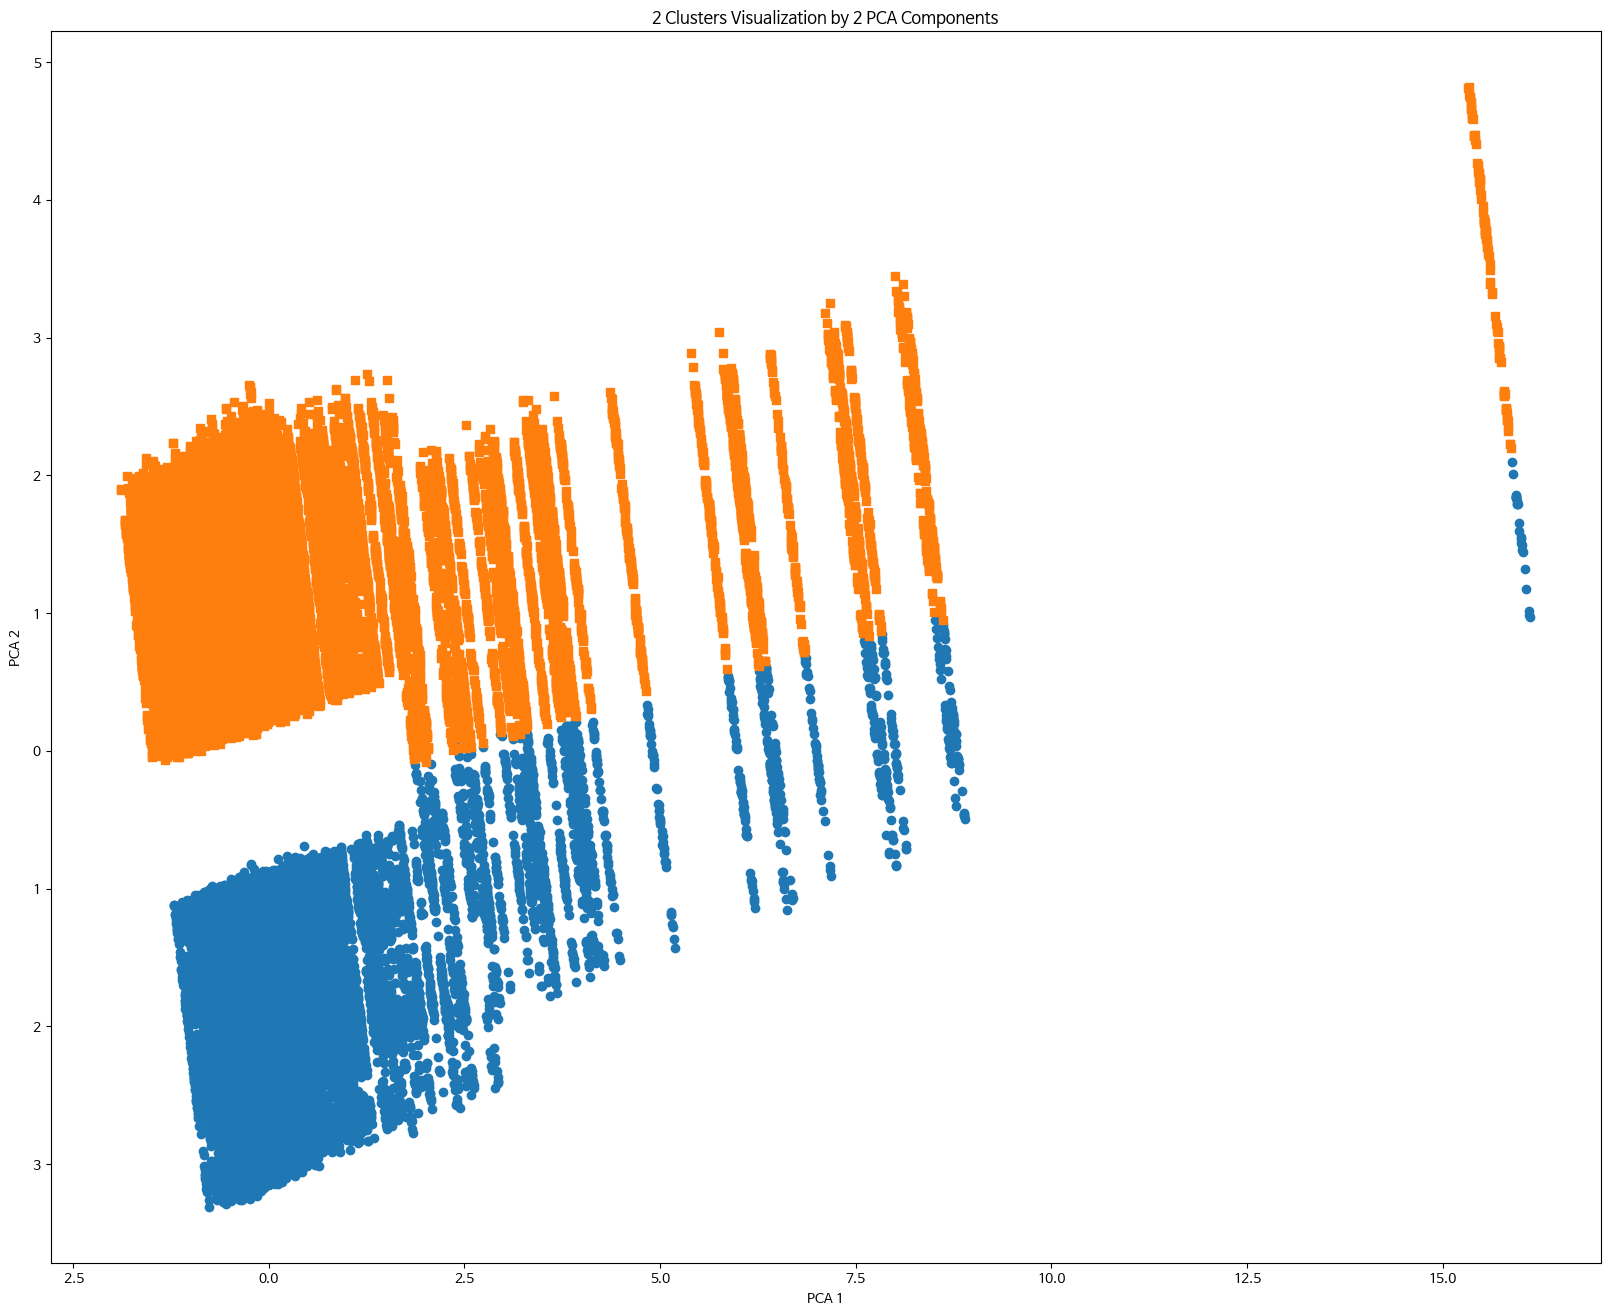

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = cordf[cordf['cluster2']==0].index
marker1_ind = cordf[cordf['cluster2']==1].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s 로 마커 표시
plt.scatter(x=cordf.loc[marker0_ind, 'pca_x'], y=cordf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=cordf.loc[marker1_ind, 'pca_x'], y=cordf.loc[marker1_ind, 'pca_y'], marker='s') #사각형

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.show()

In [ ]:
cordf.groupby('cluster2')['silhouette_coeff'].mean()

cluster2
0    0.180136
1    0.161850
Name: silhouette_coeff, dtype: float64

### 결과해석하기 군집 3개

In [ ]:
# cluster 열이 0인 데이터들의 describe 출력
cluster_0_data = cordf[cordf['cluster'] == 0]
cluster_0_data = pd.DataFrame(cluster_0_data)
cluster_0_data[['풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림']].describe().round(3)

#print(cluster_0_data.describe())
#print(describe_cluster_0)



,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,47288.000,47288.000,47288.000,47288.000,47288.000,47288.000,47288.000,47288.000
mean,-0.029,-0.035,-0.135,0.059,-0.124,-0.102,-0.027,-0.095
std,0.997,0.991,0.000,1.057,0.374,0.000,0.980,0.000
min,-1.800,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
25%,-0.935,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
50%,0.133,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
75%,0.743,1.263,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
max,1.761,1.263,-0.135,2.438,6.942,-0.102,1.935,-0.095


In [ ]:
# cluster 열이 1인 데이터들의 describe 출력
cluster_1_data = cordf[cordf['cluster'] == 1]
cluster_1_data = pd.DataFrame(cluster_1_data)
cluster_1_data[['풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림']].describe().round(3)

#print(cluster_0_data.describe())
#print(describe_cluster_0)



,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,6231.000,6231.000,6231.000,6231.00,6231.000,6231.000,6231.000,6231.000
mean,0.301,0.903,1.691,-0.41,1.542,1.277,0.543,1.190
std,0.986,0.781,3.234,0.00,3.018,3.433,1.215,3.467
min,-1.444,-0.792,-0.135,-0.41,-0.144,-0.102,-0.517,-0.095
25%,-0.376,1.263,-0.135,-0.41,-0.144,-0.102,-0.517,-0.095
50%,0.438,1.263,-0.135,-0.41,-0.144,-0.102,-0.517,-0.095
75%,1.405,1.263,-0.135,-0.41,-0.144,-0.102,1.935,-0.095
max,1.659,1.263,7.419,-0.41,6.942,9.822,1.935,10.540


In [ ]:
# cluster 열이 2인 데이터들의 describe 출력
cluster_2_data = cordf[cordf['cluster'] == 2]
cluster_2_data = pd.DataFrame(cluster_2_data)
cluster_2_data[['풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림']].describe().round(3)

#print(cluster_0_data.describe())
#print(describe_cluster_0)



,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,30887.000,30887.000,30887.000,30887.000,30887.000,30887.000,30887.000,30887.000
mean,-0.016,-0.129,-0.135,-0.008,-0.121,-0.102,-0.068,-0.095
std,0.997,0.961,0.000,0.992,0.405,0.000,0.948,0.000
min,-1.800,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
25%,-0.935,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
50%,0.133,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
75%,0.743,1.263,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
max,1.761,1.263,-0.135,2.438,6.942,-0.102,1.935,-0.095


### 결과해석 군집 2개

In [ ]:
# cluster 열이 2인 데이터들의 describe 출력
cluster_2_data = cordf[cordf['cluster2'] == 0]
cluster_2_data = pd.DataFrame(cluster_2_data)
cluster_2_data[['풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림']].describe().round(3)


,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,32759.000,32759.000,32759.000,32759.000,32759.000,32759.000,32759.000,32759.000
mean,-0.000,-0.071,-0.028,-0.031,-0.021,-0.025,-0.032,-0.032
std,0.998,0.981,0.894,0.968,0.927,0.869,0.976,0.818
min,-1.800,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
25%,-0.935,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
50%,0.184,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
75%,0.743,1.263,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
max,1.761,1.263,7.419,2.438,6.942,9.822,1.935,10.540


In [ ]:
# cluster 열이 2인 데이터들의 describe 출력
cluster_2_data = cordf[cordf['cluster2'] == 1]
cluster_2_data = pd.DataFrame(cluster_2_data)
cluster_2_data[['풍향',	'안개',	'짙은안개',	'번개',	'진눈깨비',	'서리',	'연기/연무',	'눈날림']].describe().round(3)


,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,51647.000,51647.000,51647.000,51647.000,51647.000,51647.000,51647.000,51647.000
mean,0.000,0.045,0.017,0.020,0.013,0.016,0.021,0.020
std,1.001,1.010,1.062,1.020,1.043,1.075,1.014,1.099
min,-1.800,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
25%,-0.935,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
50%,0.184,-0.792,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
75%,0.743,1.263,-0.135,-0.410,-0.144,-0.102,-0.517,-0.095
max,1.761,1.263,7.419,2.438,6.942,9.822,1.935,10.540
